## 1. Introduction to Spacy

In [3]:
import spacy
nlp = spacy.blank("en") #Creates a blank English nlp object

In [10]:
doc = nlp("Hello World!")

#Index into the doc to get a single Token
token = doc[1]

#Get the token text via .text attribute
print(token.text)

World


In [8]:
#Span the Object

In [11]:
span = doc[1:3]
print(span.text)

World!


In [13]:
#Lexical Attributes
doc = nlp("It costs $5.")

print("Index:   ", [token.i for token in doc]) #i is the index of the token wihin the parent document
print("Text:    ", [token.text for token in doc]) #.text returns the token text

print("is_alpha:", [token.is_alpha for token in doc]) #Whether the token consists of alphabetic characters
print("is_punct:", [token.is_punct for token in doc]) #Whether the token consists of punchuations
print("like_num:", [token.like_num for token in doc]) #Whether the token consists of numbers

Index:    [0, 1, 2, 3, 4]
Text:     ['It', 'costs', '$', '5', '.']
is_alpha: [True, True, False, False, False]
is_punct: [False, False, False, False, True]
like_num: [False, False, False, True, False]


In this example, you’ll use spaCy’s Doc and Token objects, and lexical attributes to find percentages in a text. You’ll be looking for two subsequent tokens: a number and a percent sign.

Use the like_num token attribute to check whether a token in the doc resembles a number.
Get the token following the current token in the document. The index of the next token in the doc is token.i + 1.
Check whether the next token’s text attribute is a percent sign ”%“.

In [14]:
nlp = spacy.blank("en")

# Process the text
doc = nlp(
    "In 1990, more than 60% of people in East Asia were in extreme poverty. "
    "Now less than 4% are."
)

# Iterate over the tokens in the doc
for token in doc:
    # Check if the token resembles a number
    if token.like_num:
        # Get the next token in the document
        next_token = doc[token.i + 1]
        # Check if the next token's text equals "%"
        if next_token.text == "%":
            print("Percentage found:", token.text)

Percentage found: 60
Percentage found: 4


## 2. Trained Pipelines

### Trained Pipelines are:
    - Models that enable spaCy to predict linguistic attributes in context
        - Part-of-speech-tags
        - Syntactic dependencies
        - Named entities
    - Trained on labled example texts
    - Can be updated with more examples to fine-tune predictions

In [1]:
import spacy

nlp = spacy.load("en_core_web_sm")

In [2]:
doc = nlp("She ate the pizza")

#Iterate over the tokens
for token in doc:
    print(token.text, token.pos_) #Prints the text and the predicted part-of-speech tag

She PRON
ate VERB
the DET
pizza NOUN


.text returns the text
.pos_ returns the part of speech tag
.dep_ returns the predicted dependency label
.head returns the syntactic head token. (Parent token this word is attacked to)

In [5]:
for token in doc:
    print(token.text, token.pos_, token.dep_, token.head.text) 

She PRON nsubj ate
ate VERB ROOT ate
the DET det pizza
pizza NOUN dobj ate


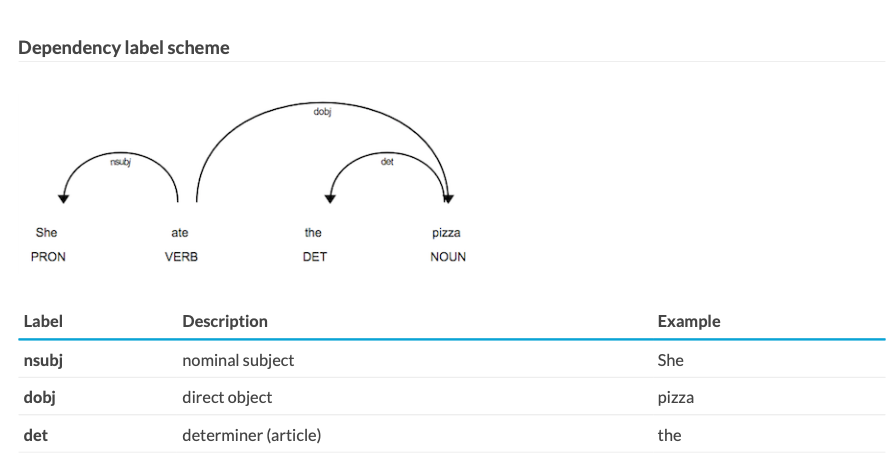

In [7]:
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")

for ent in doc.ents: #Entities are "real world objects"
    print(ent.text, ent.label_) #Predicts Apple as organization, U.K. as a geopolitical entity, and $1 billion as money

Apple ORG
U.K. GPE
$1 billion MONEY


In [9]:
spacy.explain("GPE")

'Countries, cities, states'

In [10]:
spacy.explain("NNP")

'noun, proper singular'

In [11]:
spacy.explain("dobj")

'direct object'

In [12]:
import spacy

nlp = spacy.load("en_core_web_sm")

text = "It’s official: Apple is the first U.S. public company to reach a $1 trillion market value"

# Process the text
doc = nlp(text)

for token in doc:
    # Get the token text, part-of-speech tag and dependency label
    token_text = token.text
    token_pos = token.pos_
    token_dep = token.dep_
    # This is for formatting only
    print(f"{token_text:<12}{token_pos:<10}{token_dep:<10}")

It          PRON      nsubj     
’s          VERB      ccomp     
official    ADJ       acomp     
:           PUNCT     punct     
Apple       PROPN     nsubj     
is          AUX       ROOT      
the         DET       det       
first       ADJ       amod      
U.S.        PROPN     nmod      
public      ADJ       amod      
company     NOUN      attr      
to          PART      aux       
reach       VERB      relcl     
a           DET       det       
$           SYM       quantmod  
1           NUM       compound  
trillion    NUM       nummod    
market      NOUN      compound  
value       NOUN      dobj      


In [1]:
import spacy

from spacy.matcher import Matcher

In [3]:
nlp = spacy.load("en_core_web_sm")

matcher = Matcher(nlp.vocab)

pattern = [{"TEXT": "iPhone"}, {"TEXT": "X"}]
matcher.add("IPHONE_PATTERN", [pattern])

doc = nlp("Upcoming iPhone X release date leaked")

matches = matcher(doc)

In [4]:
doc = nlp("Upcoming iPhone X release date leaked")

matches = matcher(doc)

for match_id, start, end in matches:
    matched_span = doc[start:end]
    print(matched_span.text)

iPhone X


In [20]:
import spacy
from spacy.matcher import Matcher

nlp = spacy.load("en_core_web_sm")
matcher = Matcher(nlp.vocab)

doc = nlp(
    "After making the iOS update you won't notice a radical system-wide "
    "redesign: nothing like the aesthetic upheaval we got with iOS 7. Most of "
    "iOS 11's furniture remains the same as in iOS 10. But you will discover "
    "some tweaks once you delve a little deeper."
)

# Write a pattern for full iOS versions ("iOS 7", "iOS 11", "iOS 10")
pattern = [{"TEXT": "iOS"}, {"IS_DIGIT": True}]

# Add the pattern to the matcher and apply the matcher to the doc
matcher.add("IOS_VERSION_PATTERN", [pattern])
matches = matcher(doc)
print("Total matches found:", len(matches))

# Iterate over the matches and print the span text
for match_id, start, end in matches:
    print("Match found:", doc[start:end].text)

Total matches found: 3
Match found: iOS 7
Match found: iOS 11
Match found: iOS 10


In [22]:
import spacy
from spacy.matcher import Matcher

nlp = spacy.load("en_core_web_sm")
matcher = Matcher(nlp.vocab)

doc = nlp(
    "i downloaded Fortnite on my laptop and can't open the game at all. Help? "
    "so when I was downloading Minecraft, I got the Windows version where it "
    "is the '.zip' folder and I used the default program to unpack it... do "
    "I also need to download Winzip?"
)

#Writing a pattern that matches a form of "download" plus proper noun
pattern = [{"LEMMA": "download"}, {"POS": "PROPN"}]

#Adding the pattern to the matcher and applying the matcher to the doc
matcher.add("DOWNLOAD_THINGS_PATTERN", [pattern])
matches = matcher(doc)
print("Total matches found: ", len(matches))

#Iterating over the matches and printing the span text
for match_id, start, end in matches:
    print("Match found", doc[start:end].text)

Total matches found:  3
Match found downloaded Fortnite
Match found downloading Minecraft
Match found download Winzip


In [23]:
import spacy
from spacy.matcher import Matcher

nlp = spacy.load("en_core_web_sm")
matcher = Matcher(nlp.vocab)

doc = nlp(
    "Features of the app include a beautiful design, smart search, automatic "
    "labels and optional voice responses."
)

pattern = [{"POS": "ADJ"}, {"POS": "NOUN"}, {"POS": "NOUN", "OP": "?"}]

# Add the pattern to the matcher and apply the matcher to the doc
matcher.add("ADJ_NOUN_PATTERN", [pattern])
matches = matcher(doc)
print("Total matches found:", len(matches))

# Iterate over the matches and print the span text
for match_id, start, end in matches:
    print("Match found:", doc[start:end].text)

Total matches found: 5
Match found: beautiful design
Match found: smart search
Match found: automatic labels
Match found: optional voice
Match found: optional voice responses


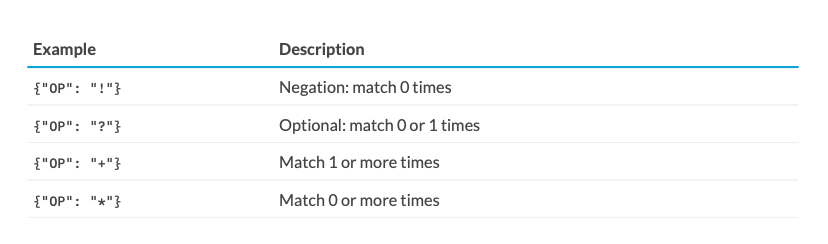